In [1]:
import random

import numpy as np
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)

<div class="alert alert-danger">
  <strong>Información!</strong> 
  
  Las funciones de <i>plot</i> y de los métodos de Aceptación-Rechazo Simple y General son las mismas que las usadas en el fichero <i>3. Acceptance-rejection method</i>.
</div>

In [2]:
def plot(Y_accepted, f, Y_rejected=None):
    nbins = 500
    y_accepted, x_accepted = np.histogram(Y_accepted, normed=True, bins=nbins)
    x_original = np.arange(min(Y_accepted), max(Y_accepted), 0.001)
    y_original = f(x_original)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].plot(x_accepted[:nbins], y_accepted, label='Accepted')
    
    if Y_rejected is not None:
        y_rejected, x_rejected = np.histogram(Y_rejected, normed=True, bins=nbins)
        ax[0].plot(x_rejected[:nbins], y_rejected, label='Rejected')
        
    ax[0].legend(loc='best')
    ax[0].set_title('Simulated')
    ax[1].plot(x_original, y_original)
    ax[1].set_title('Original')
    plt.show()

# Método de Aceptación-Rechazo Simple

In [3]:
def simple_accept_reject_method(f, max_point, xdomain=(0, 1), N=100000):
    if N < 1:
        raise ValueError("N parameter must be greater than 1.")
        
    Y_accepted = []
    Y_rejected = []

    for i in range(N):
        x = np.random.uniform(xdomain[0], xdomain[1])
        fx = f(x)
        u = np.random.uniform(0, max_point)

        if u <= fx:
            Y_accepted.append(x)
        else:
            Y_rejected.append(x) 
    
    return np.array(Y_accepted), np.array(Y_rejected)

# Método de Aceptación-Rechazo general

In [4]:
def is_envelope_function(f, g, M, xdomain=(0, 1), **kwargs):
    if xdomain[0] >= xdomain[1]:
        raise ValueError("First value of the xdomain must be lower than the second value.")
        
    x = np.arange(xdomain[0], xdomain[1], 0.001)
    y_base = f(x)
    y_envelope = g(x, **kwargs)
    
    return sum((y_envelope * M - y_base) < 0) == 0

In [5]:
def plot_envelope_function(f, g, M, xdomain=(0, 1), **kwargs):
    if xdomain[0] >= xdomain[1]:
        raise ValueError("First value of the xdomain must be lower than the second value.")
        
    x = np.arange(xdomain[0], xdomain[1], 0.001)
    y_base = f(x)
    y_envelope = g(x, **kwargs)
    
    plt.plot(x, y_base, label='Base function - f(x)')
    plt.plot(x, y_envelope * M, label='Envelope Function - g(x)')
    plt.legend(loc='best')
    plt.show()

In [6]:
def general_accept_reject_method(f, g, M, distrib_func, xdomain=None, N=100000, **kwargs):
    if N < 1:
        raise ValueError("N parameter must be greater than 1.")
        
    Y_accepted = []
    Y_rejected = []
    
    y = distrib_func(size=N, **kwargs)
    
    if xdomain is not None:
        if xdomain[0] >= xdomain[1]:
            raise ValueError("First value of the xdomain must be lower than the second value.")
        y = y[(y > xdomain[0]) & (y < xdomain[1])]

    for i in y:
        fy = f(i)
        gy = g(i, **kwargs)
        u = np.random.uniform(0, 1)

        if u <= fy / (M * gy):
            Y_accepted.append(i)
        else:
            Y_rejected.append(i)
            
    return np.array(Y_accepted), np.array(Y_rejected)

# Método *Hit and Miss*

In [7]:
def hit_and_miss_method(g, max_point, xdomain, N=100000):
    if N < 1:
        raise ValueError("N parameter must be greater than 1.")
            
    Y_accepted, Y_rejected = simple_accept_reject_method(g, max_point, xdomain, N=N)
        
    n_accepted = len(Y_accepted)
    p = n_accepted / N
            
    result = max_point * (xdomain[1] - xdomain[0]) * p
    error = (max_point * (xdomain[1] - xdomain[0]) * np.sqrt(p * (1 - p))) / np.sqrt(N)
    
    return np.array(result), np.array(error)

# Método de Muestreo Uniforme

In [8]:
def uniform_sampling_method(G, xdomain=(0, 1), N=100000):
    U = np.random.uniform(xdomain[0], xdomain[1], size = N)
    Y = G(U)
    result = sum(Y) / N
    
    return np.array(result)

# Ejercicios

#### 1. Mediante el método *Hit and Miss* determina el valor de las integrales siguientes:

#### a) $ \int_{0}^{1} 20 x (1 - x)^3 \ dx $

In [9]:
g = lambda x: 20 * x * (1 - x)**3
a = 0
b = 1
max_point = 135/64
N = 10000000

result, error = hit_and_miss_method(g, max_point, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)
print("Error estándar --> ", error)

Resultado de la integral --> 0.9998097890625001
Error estándar -->  0.00033306968632682715


#### b) $ \int_{-1}^{1} \frac{2}{\pi} \sqrt{1 - x^2} \ dx$

In [10]:
g = lambda x: (2 / np.pi) * np.sqrt(1 - x**2)
a = -1
b = 1
max_point = 2 / np.pi
N = 10000000

result, error = hit_and_miss_method(g, max_point, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)
print("Error estándar --> ", error)

Resultado de la integral --> 1.0001716792944466
Error estándar -->  0.00016526183635043844


#### c) $ \int_{0}^{1} cos(\frac{\pi x}{2}) \ dx $

In [11]:
    g = lambda x: np.cos((np.pi * x) / 2)
a = 0
b = 1
max_point = 1
N = 10000000

result, error = hit_and_miss_method(g, max_point, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)
print("Error estándar --> ", error)

Resultado de la integral --> 0.636672
Error estándar -->  0.00015209232867439433


#### 2. Integra mediante el método de integración de Monte Carlo simulando la variable aleatoria *X* con el método de la distribución inversa:

#### a) $ \int_{0}^{\infty} \sqrt{x} \ cos(x) \ e^{-x} \ dx $

In [38]:
N = 10**6

U = np.random.uniform(0, 1, size = N)
X = -np.log(U)
g = lambda x: np.sqrt(x) * np.cos(x)
Y = g(X)

result = sum(Y) / N
print("Resultado de la integral -->", result)

Resultado de la integral --> 0.203024537386


#### b) $ \int_{0}^{\infty} (x^2 + 3) \ sin(x) \ e^{-x} \ dx $

In [39]:
N = 10**6

U = np.random.uniform(0, 1, size = N)
X = -np.log(U)
g = lambda x: (x**2 + 3) * np.sin(x)
Y = g(X)

result = sum(Y) / N
print("Resultado de la integral -->", result)

Resultado de la integral --> 1.99962620164


#### 3. Integra mediante el método de integración de Monte Carlo de aceptación y rechazo simple:

$$ \int_{0}^{1} \sqrt{1 - x^2} \ dx $$

** donde $ G(x) = \frac{\sqrt{1 - x^2}}{\frac{3}{2} (1 - x^2)} $ y $ f(x) = \frac{3}{2}(1 - x^2) $. Compara los resultados obtenidos con el método *Hit and Miss* y Muestreo Uniforme. **

Calculamos la integral mediante el método de aceptación y rechazo simple:

In [40]:
f = lambda x: (3/2) * (1 - x**2)
G = lambda x: (np.sqrt(1 - x**2)) / ((3/2) * (1 - x**2))
M = 3/2
N = 10**7

Y_accepted, Y_rejected = simple_accept_reject_method(f, M, N=N)
        
n_accepted = len(Y_accepted)
Y = G(Y_accepted)
result = sum(Y / n_accepted)

print("Resultado de la integral -->", result)

Resultado de la integral --> 0.785356548161


Calculamos la integral mediante el método *Hit and Miss*:

In [41]:
g = lambda x: np.sqrt(1 - x**2)
a = 0
b = 1
max_point = 1
N = 10**7

result, error = hit_and_miss_method(g, max_point, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)
print("Error estándar --> ", error)

Resultado de la integral --> 0.7855332
Error estándar -->  0.00012979629875222172


Calculamos la integral mediante el método de Muestreo Simple:

In [42]:
g = lambda x: np.sqrt(1 - x**2)
a = 0
b = 1
N = 10**7

result = uniform_sampling_method(g, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)

Resultado de la integral --> 0.7854796198242749


#### 4. Integra mediante muestreo uniforme:

#### a) $ \int_{-1}^{1} \frac{2}{\pi} \sqrt{1 - x^2} \ dx $

In [44]:
g = lambda x: 2 * (2 / np.pi) * np.sqrt(1 - x**2)
a = -1
b = 1
N = 10**7

result = uniform_sampling_method(g, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)

Resultado de la integral --> 1.0000595142079487


#### b) $ \int_{0}^{1} cos(\frac{\pi x}{2}) \ dx $

In [45]:
g = lambda x: np.cos((np.pi * x) / 2)
a = 0
b = 1
N = 10**7

result = uniform_sampling_method(g, xdomain=(a, b), N=N)

print("Resultado de la integral -->", result)

Resultado de la integral --> 0.6366845801599965


#### 5. Estima la siguiente integral mediante el método de integración por importancia:

$$ \int_{0}^{\infty} cos(x) \ x^2 e^{-x} \ dx $$

** en los siguientes casos: **

#### a) $ G(x) = cos(x) \ x^2 $  &nbsp; y &nbsp; $ f(x) = e^{-x} $

In [47]:
N = 10**7

U = np.random.uniform(0, 1, size = N)
X = -np.log(U)
G = lambda x: np.cos(x) * x**2
Y = G(X)

result = sum(Y) / N
variance = np.sqrt(sum((Y - sum(Y) / N)**2) / (N - 1))

print("Resultado de la integral -->", result)
print("Varianza --> ", variance)

Resultado de la integral --> -0.502072467933
Varianza -->  3.45212133783


***

#### b) $ G(x) = cos(x) \ x $ &nbsp; y &nbsp; $ f(x) = x e^{-x} $

Mediante una Cauchy:

$$ g_Y(x) = \frac{1}{\pi \gamma (1 + (\frac{x - x_0}{\gamma})^2)} $$

¿Está f(x) acotada por Mg(x)? --> True


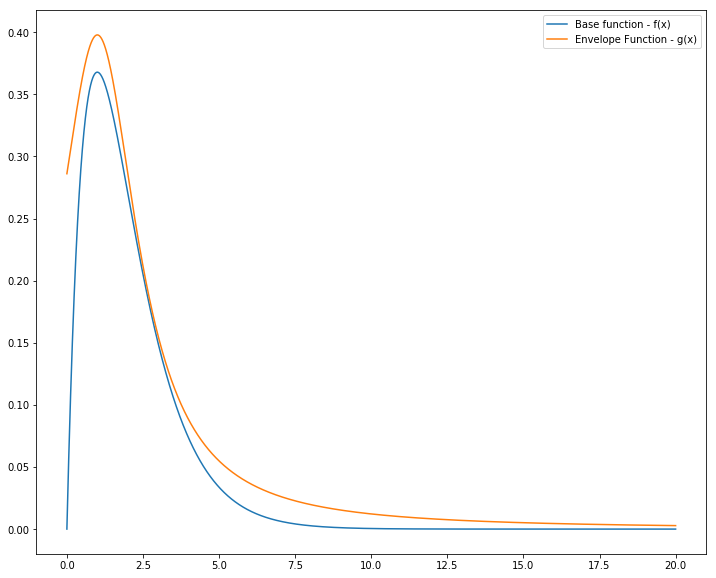

In [214]:
f = lambda x: x * np.e**(-x)

x_0 = 1
gamma = 1.6
M = 2
xdomain = (0, 20)

print('¿Está f(x) acotada por Mg(x)? -->', is_envelope_function(f, st.cauchy.pdf, M, 
                                                                xdomain=xdomain, 
                                                                loc=x_0, scale=gamma))
plot_envelope_function(f, st.cauchy.pdf, M, xdomain=xdomain, loc=x_0, scale=gamma)

Por lo tanto,

$$ f_X(x) = x e^{-x} $$

$$ g_Y(x) = \frac{1}{\pi \ 1.6 \ (1 + (\frac{x - 1}{1.6})^2)} $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{x e^{-x}}{\frac{1}{\pi \ 1.6 \ \left(1 + \left(\frac{x - 1}{1.6} \right)^2 \right)}} $$

alcanza el máximo en $ h(2.6632) = 1.94197 $. Por lo tanto, $ M = 1.94197 $.

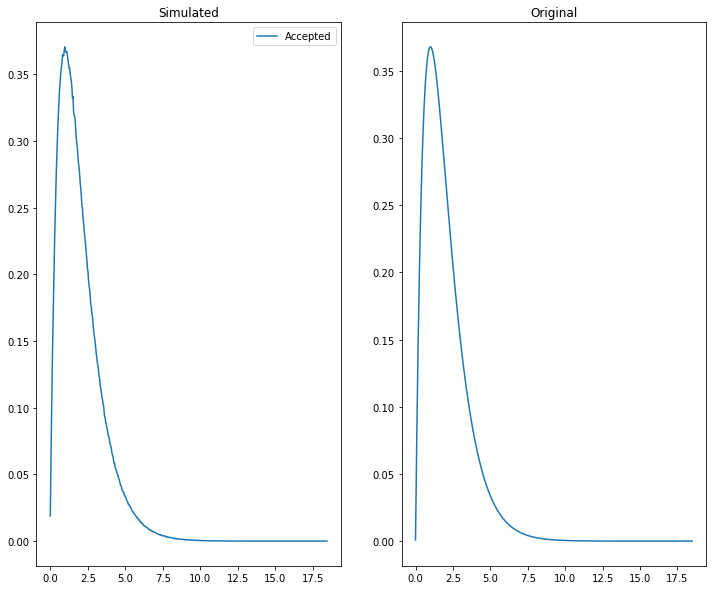

In [215]:
g = lambda x, loc, scale: 1 / (np.pi * scale * (1 + ((x - loc) / scale)**2))

M = 1.94197
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      st.cauchy.rvs, 
                                                      xdomain=xdomain, N=N, 
                                                      loc=x_0, scale=gamma)

plot(Y_accepted, f)

In [216]:
G = lambda x: np.cos(x) * x

n_accepted = len(Y_accepted)
Y = G(Y_accepted)
result = sum(Y / n_accepted)
variance = np.sqrt(sum((Y - sum(Y) / N)**2) / (N - 1))

print("Resultado de la integral -->", result)
print("Varianza --> ", variance)

Resultado de la integral --> -0.499105167413
Varianza -->  1.19572664284


***

#### c) $ G(x) = 2 cos(x) $ &nbsp; y &nbsp; $ f(x) = \frac{1}{2} x^2 e^{-x} $

Mediante una Cauchy:

$$ g_Y(x) = \frac{1}{\pi \gamma (1 + (\frac{x - x_0}{\gamma})^2)} $$

¿Está f(x) acotada por Mg(x)? --> True


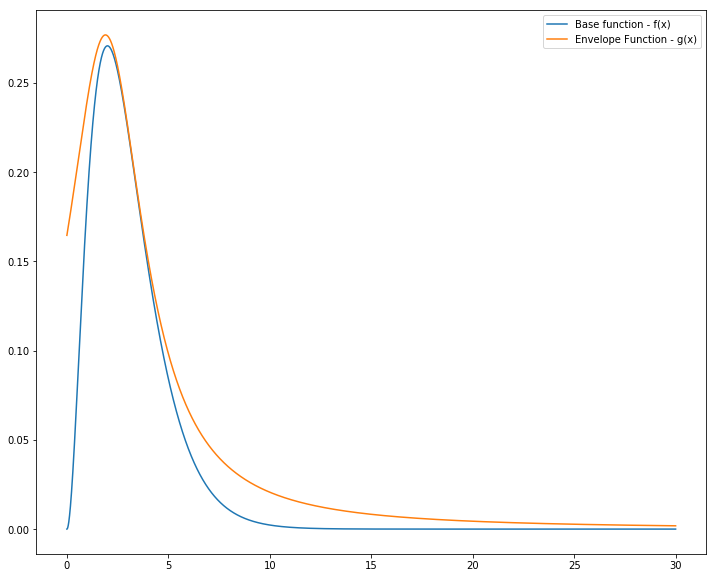

In [218]:
f = lambda x: (1/2) * x**2 * np.e**(-x)

x_0 = 1.9
gamma = 2.3
M = 2
xdomain = (0, 30)

print('¿Está f(x) acotada por Mg(x)? -->', is_envelope_function(f, st.cauchy.pdf, M, 
                                                                xdomain=xdomain, 
                                                                loc=x_0, scale=gamma))
plot_envelope_function(f, st.cauchy.pdf, M, xdomain=xdomain, loc=x_0, scale=gamma)

Por lo tanto,

$$ f_X(x) = \frac{1}{2} x^2 e^{-x} $$

$$ g_Y(x) = \frac{1}{\pi \ 2.3 \ (1 + (\frac{x - 1.9}{2.3})^2)} $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{\frac{1}{2} x^2 e^{-x}}{\frac{1}{\pi \ 2.3 \ \left(1 + \left(\frac{x - 1.9}{2.3} \right)^2 \right)}} $$

alcanza el máximo en $ h(3.14414) = 1.98992 $. Por lo tanto, $ M = 1.98992 $.

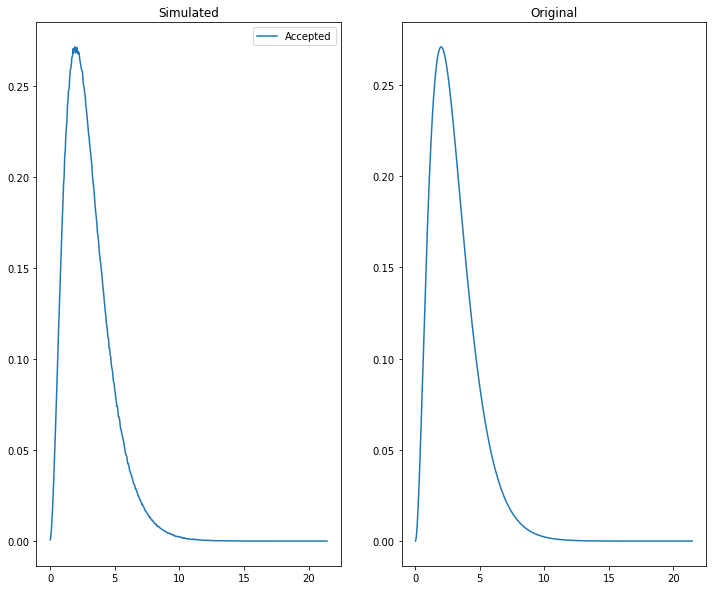

In [219]:
g = lambda x, loc, scale: 1 / (np.pi * scale * (1 + ((x - loc) / scale)**2))

M = 1.98992
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      st.cauchy.rvs, 
                                                      xdomain=xdomain, N=N, 
                                                      loc=x_0, scale=gamma)

plot(Y_accepted, f)

In [220]:
G = lambda x: 2 * np.cos(x)

n_accepted = len(Y_accepted)
Y = G(Y_accepted)
result = sum(Y / n_accepted)
variance = np.sqrt(sum((Y - sum(Y) / N)**2) / (N - 1))

print("Resultado de la integral -->", result)
print("Varianza --> ", variance)

Resultado de la integral --> -0.501530727713
Varianza -->  0.906447163238


***

#### d) $ G(x) = \pi (x^2 + 1) \ cos(x) \ x^2 e^{-x} $ &nbsp; y &nbsp; $ f(x) = \frac{1}{\pi} \frac{1}{1 + x^2} $

$ f(x) $ no es una función de densidad porque su integral entre 0 e infinito es 0.5. Por lo tanto,

 $$ G(x) = \frac{1}{2} \ (\pi (x^2 + 1) \ cos(x) \ x^2 e^{-x}) $$
 
 $$ f(x) = 2 \ \left(\frac{1}{\pi} \frac{1}{1 + x^2} \right) $$

¿Está f(x) acotada por Mg(x)? --> True


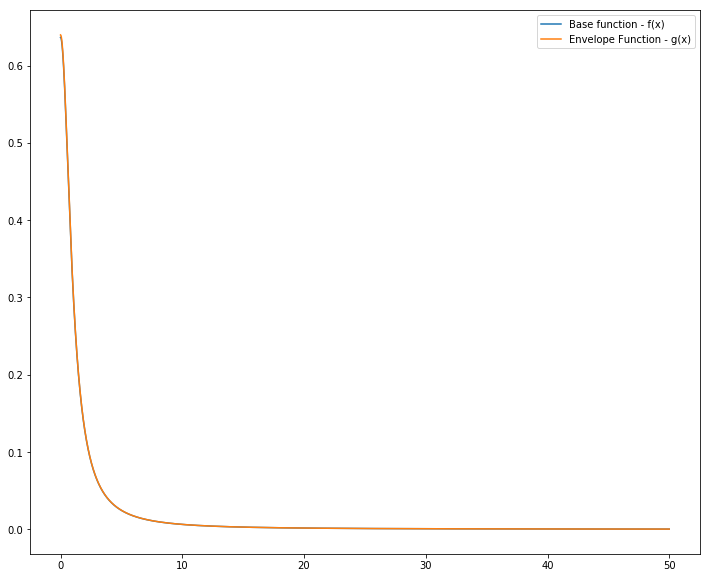

In [226]:
f = lambda x: 2 / (np.pi * (1 + x**2))

x_0 = 0
gamma = 1
M = 2.01
xdomain = (0, 50)

print('¿Está f(x) acotada por Mg(x)? -->', is_envelope_function(f, st.cauchy.pdf, M, 
                                                                xdomain=xdomain, 
                                                                loc=x_0, scale=gamma))
plot_envelope_function(f, st.cauchy.pdf, M, xdomain=xdomain, loc=x_0, scale=gamma)

Por lo tanto,

$$ f_X(x) = 2 \ \left(\frac{1}{\pi} \frac{1}{1 + x^2} \right) $$

$$ g_Y(x) = \frac{1}{\pi \ (1 + x^2)} $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{2 \ \left(\frac{1}{\pi} \frac{1}{1 + x^2} \right)}{\frac{1}{\pi \ (1 + x^2)}} $$

alcanza el máximo en 2. Por lo tanto, $ M = 2 $.

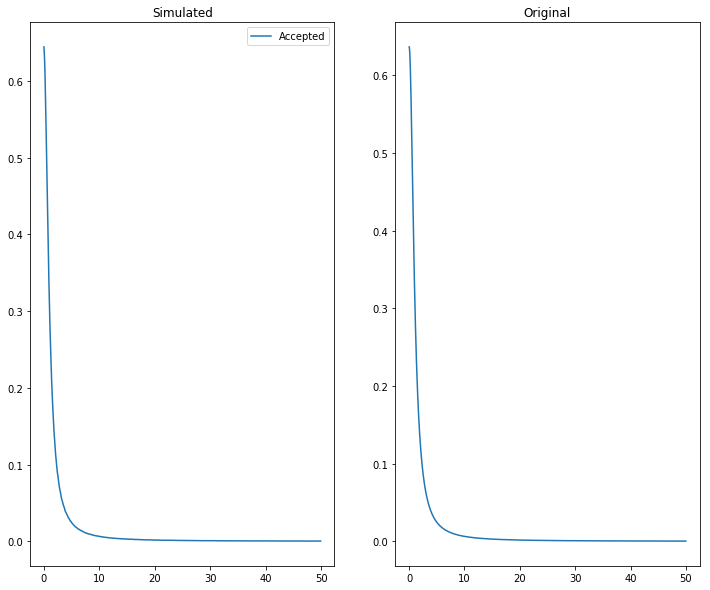

In [227]:
g = lambda x, loc, scale: 1 / (np.pi * scale * (1 + ((x - loc) / scale)**2))

M = 2
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      st.cauchy.rvs, 
                                                      xdomain=xdomain, N=N, 
                                                      loc=x_0, scale=gamma)

plot(Y_accepted, f)

In [228]:
G = lambda x: (1/2) * (np.pi * (x**2 + 1) * np.cos(x) * x**2 * np.e**-x)

n_accepted = len(Y_accepted)
Y = G(Y_accepted)
result = sum(Y / n_accepted)
variance = np.sqrt(sum((Y - sum(Y) / N)**2) / (N - 1))

print("Resultado de la integral -->", result)
print("Varianza --> ", variance)

Resultado de la integral --> -0.505608707146
Varianza -->  1.58294134579
